# Assignment 2: Ensemble Methods and Calibration


## Instructions

Please push the .ipynb, .py, and .pdf to Github Classroom prior to the deadline. Please include your UNI as well.

**Make sure to use the dataset that we provide in CourseWorks/Classroom.**

**There are a lot of applied questions based on the code results. Please make sure to answer them all. These are primarily to test your understanding of the results your code generate (similar to any Data Science/ML case study interviews).**


## Name: Gauravi Patankar
## UNI: gsp2137


## Dataset Description: Bank Marketing Dataset

This dataset contains information about direct marketing campaigns (phone calls) of a banking institution. The goal is to predict whether the client will subscribe to a term deposit. The details of the features and target are listed below:

**Features**:
- `age`: Age of the client
- `job`: Type of job
- `marital`: Marital status
- `education`: Education level
- `default`: Has credit in default?
- `balance`: Average yearly balance
- `housing`: Has housing loan?
- `loan`: Has personal loan?
- `contact`: Contact communication type
- `day`: Last contact day of the month
- `month`: Last contact month of year
- `duration`: Last contact duration in seconds
- `campaign`: Number of contacts performed during this campaign
- `pdays`: Number of days since the client was last contacted from a previous campaign
- `previous`: Number of contacts performed before this campaign
- `poutcome`: Outcome of the previous marketing campaign
- `deposit`: Has the client subscribed to a term deposit? (target)

**Objective**: The target variable (`deposit`) is binary (yes/no), and the goal is to predict whether a client will subscribe to a term deposit based on the given features.



In [139]:
## Use this cell to import necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
import xgboost as xgb

import time

## Question 1: Decision Trees


**1.1: Load the Bank Marketing Dataset and inspect its structure.**
- Hint: Inspect columns and types.


In [5]:
bank_df = pd.read_csv("bank (1).csv")

In [6]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [7]:
cols = bank_df.columns
for col in bank_df[cols]:
  print(bank_df[col].value_counts, bank_df[col])

<bound method IndexOpsMixin.value_counts of 0        59
1        56
2        41
3        55
4        54
         ..
11157    33
11158    39
11159    32
11160    43
11161    34
Name: age, Length: 11162, dtype: int64> 0        59
1        56
2        41
3        55
4        54
         ..
11157    33
11158    39
11159    32
11160    43
11161    34
Name: age, Length: 11162, dtype: int64
<bound method IndexOpsMixin.value_counts of 0             admin.
1             admin.
2         technician
3           services
4             admin.
            ...     
11157    blue-collar
11158       services
11159     technician
11160     technician
11161     technician
Name: job, Length: 11162, dtype: object> 0             admin.
1             admin.
2         technician
3           services
4             admin.
            ...     
11157    blue-collar
11158       services
11159     technician
11160     technician
11161     technician
Name: job, Length: 11162, dtype: object
<bound method IndexOpsMixi

In [8]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [9]:
bank_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [10]:
bank_df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no



**1.2: Are there any missing values in the dataset? If yes, how do you plan to handle them?**


* No, there are no missing values in the dataset. In the occurence of missing values, they would be dealt with depending on their variable type.

* For numeric variables, the median is a good estimate and the missing values would be replaced by the mean of all the other values in that variable.

* For categorical variables, the mode is used for imputation, since it replaces the missing value with the most common value.

In [11]:
bank_df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0



**1.3: Plot side-by-side bars of class distribution for each categorical feature in the dataset with respect to the target variable (e.g., `job`, `marital`, `education`, etc.).**


In [12]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

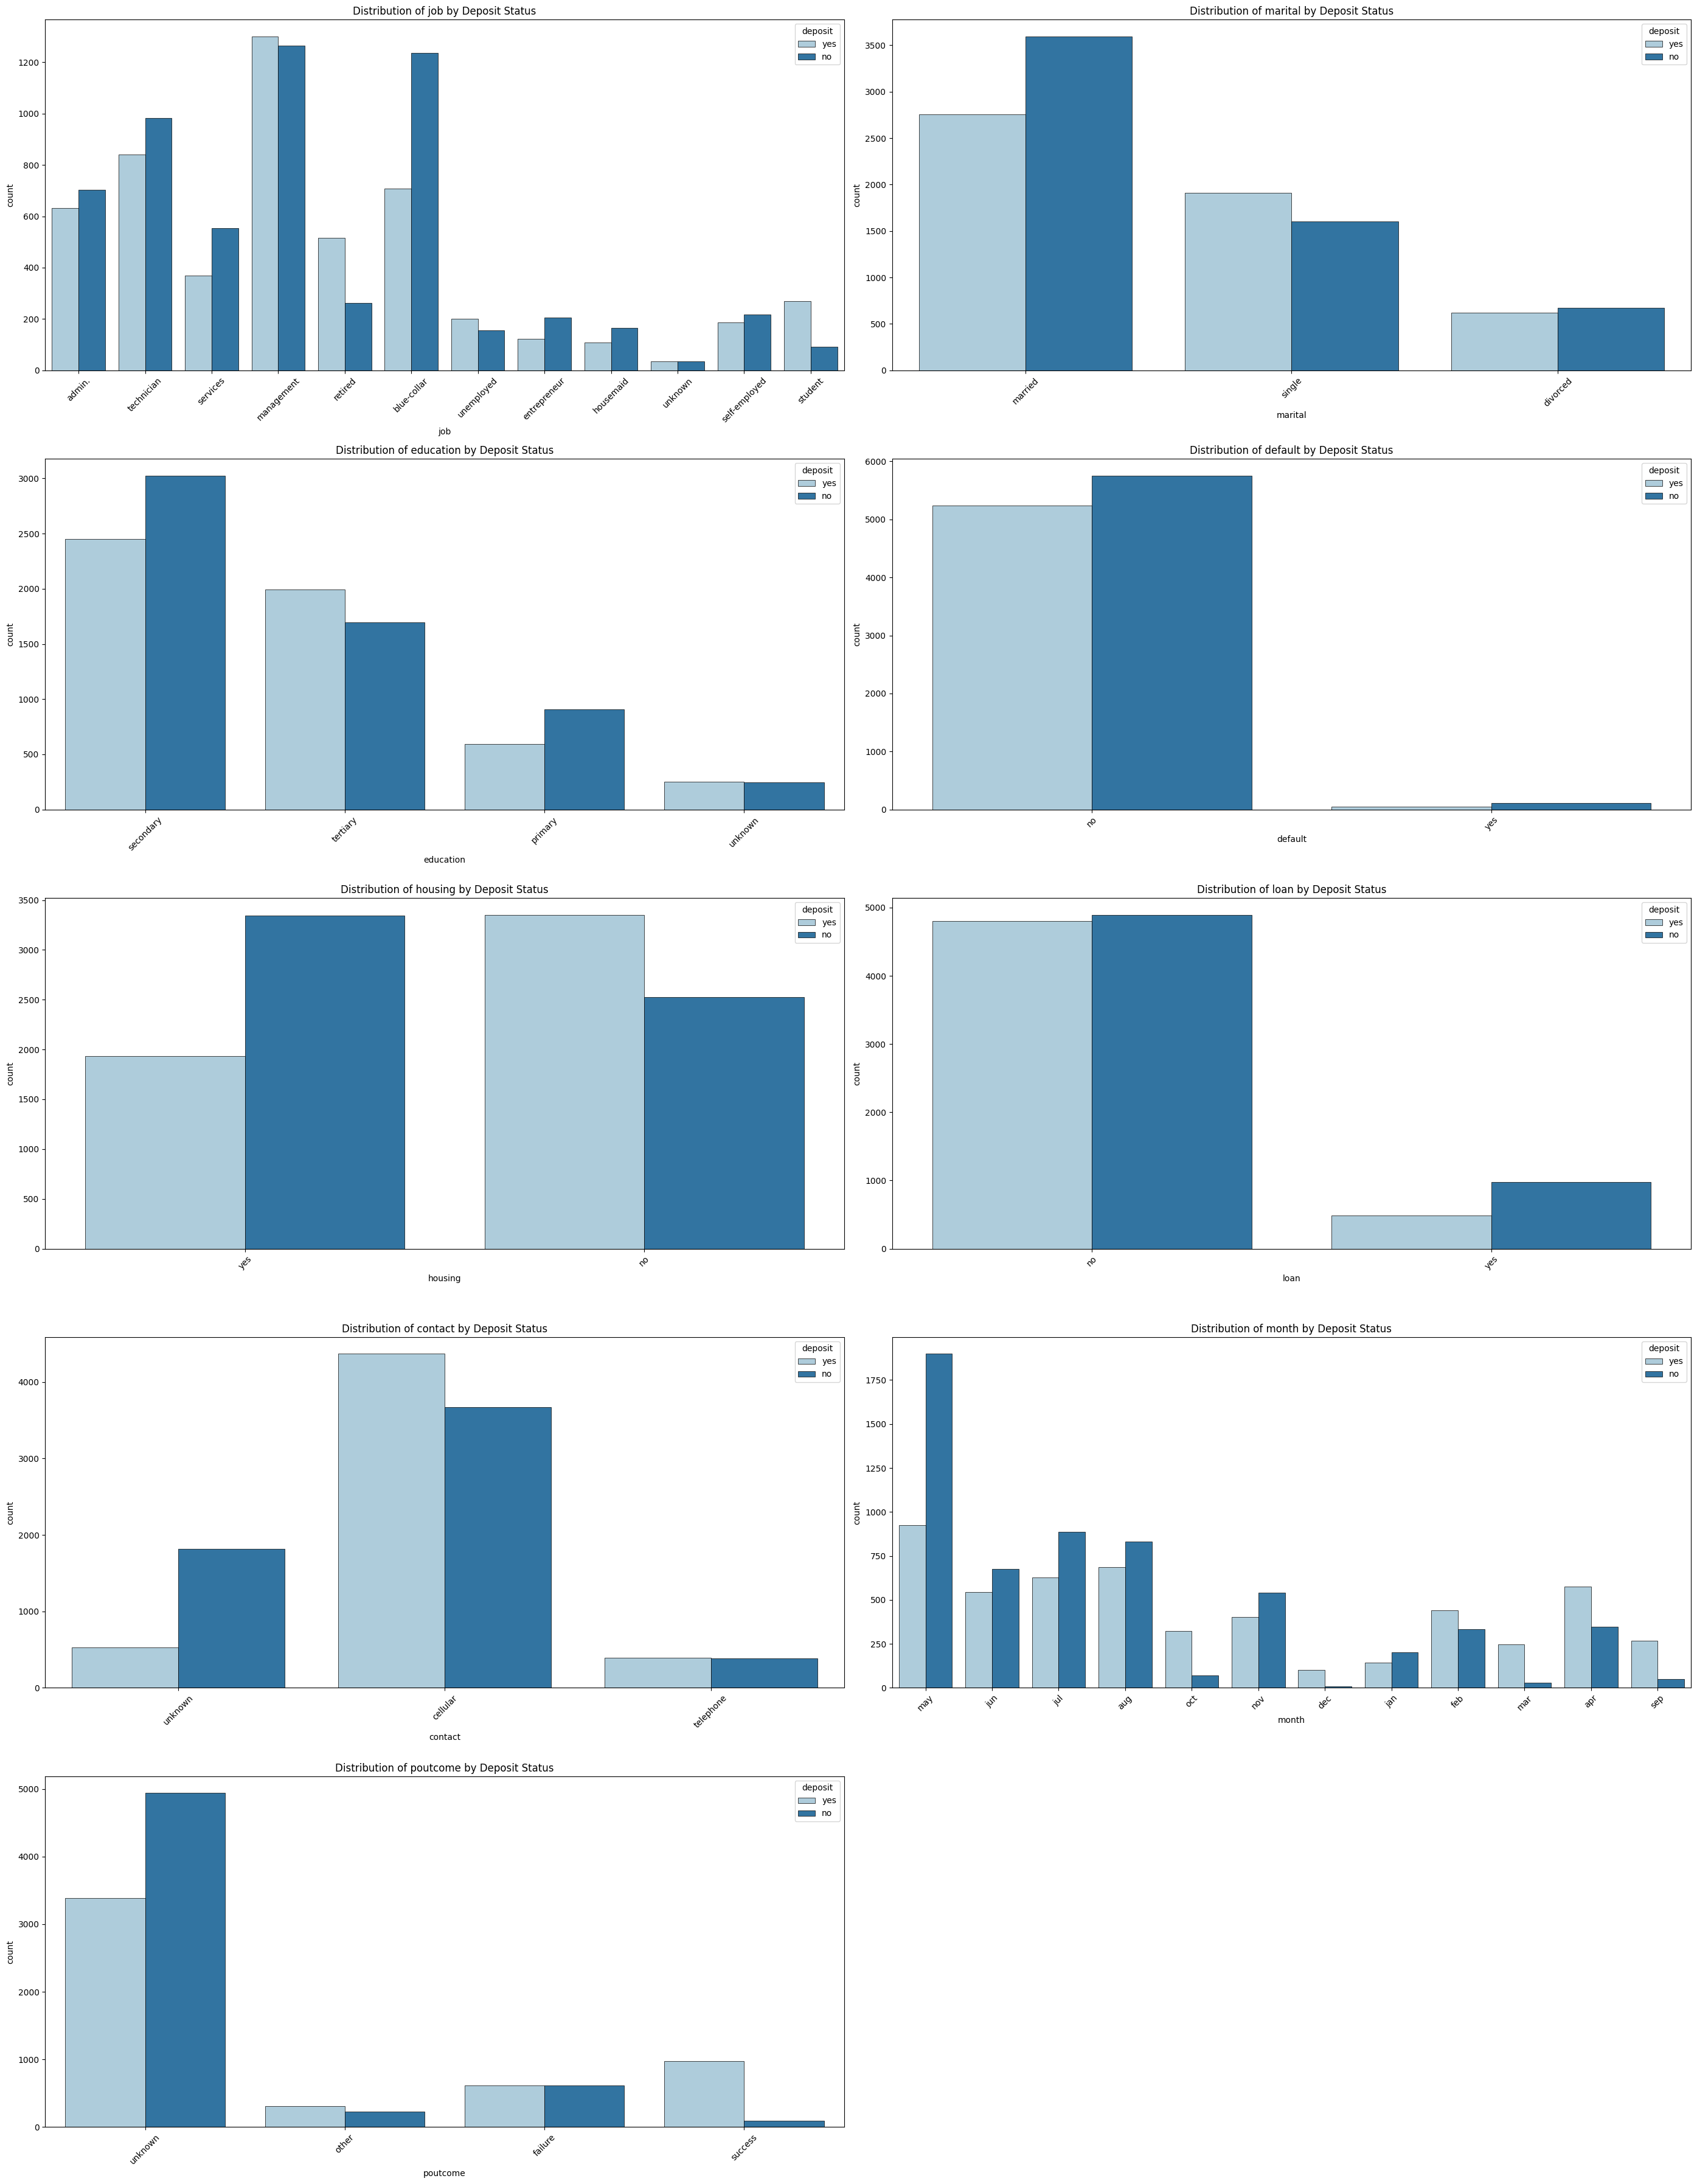

In [13]:
plt.figure(figsize=(28, 36))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(5, 2, i)  # Adjust the grid size (5 rows, 2 columns)
    sns.countplot(data = bank_df, x = feature, hue = 'deposit', palette='Paired', edgecolor='black', linewidth=.5)
    plt.title(f'Distribution of {feature} by Deposit Status')
    plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
    plt.tight_layout()  # Adjust spacing between plots

# Show the plots
plt.show()

**1.4: Explain the distribution of the target variable and the dataset.**




*   By 'job' category, 'blue collar' and 'management' jobs have overall higher counts.
*   Married people tend to have fewer subscriptions.
*   May had the largest month for subscription rejections.
*   The 'poutcome' variable has the highest counts for the 'unknown' class compared to other classes.
*   The mode of contact was via 'cellular' for most of the calls made.

**1.5: Split the data into development and test datasets. Which splitting methodology did you choose and why?**

**Hint: Based on the distribution of the data, try to use the best splitting strategy.**

In [14]:
print("Class Distribution:",bank_df["deposit"].value_counts())

Class Distribution: deposit
no     5873
yes    5289
Name: count, dtype: int64


In [15]:
# Split the dataset into features and labels
bank_X = bank_df.drop(columns=['deposit'])
bank_y = bank_df['deposit']

In [16]:
dev_X, test_X, dev_y, test_y = train_test_split(bank_X, bank_y, test_size = 0.2, random_state = 42)

**1.6: Would you drop any column? Justify your reasoning.**

**Preprocess the data (Handle the Categorical Variable). Would you consider a mix of encoding techniques? Justify.
Do we need to apply scaling? Briefly Justify**



In [17]:
bank_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [18]:
dev_X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3955,28,student,single,tertiary,no,5741,no,no,cellular,10,sep,1042,5,200,3,failure
11150,34,management,married,secondary,no,355,no,no,cellular,21,aug,314,3,-1,0,unknown
5173,48,unemployed,divorced,secondary,no,201,no,no,cellular,10,nov,594,1,91,1,success
3017,53,entrepreneur,married,tertiary,no,1961,no,no,cellular,15,dec,351,1,-1,0,unknown
2910,53,management,married,tertiary,no,1624,no,no,cellular,11,nov,166,3,97,7,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,47,management,married,tertiary,no,761,yes,no,cellular,11,jul,80,2,-1,0,unknown
5191,28,self-employed,single,tertiary,no,159,no,no,cellular,16,nov,449,2,33,4,success
5390,35,technician,married,secondary,no,1144,no,no,cellular,20,aug,197,13,-1,0,unknown
860,51,retired,married,tertiary,no,746,no,no,cellular,25,aug,372,5,-1,0,unknown


In [19]:
dev_y

,deposit
3955,yes
11150,no
5173,yes
3017,yes
2910,yes
...,...
5734,no
5191,yes
5390,no
860,yes


In [20]:
#One Hot Encoding for Categorical Variables
ohe_features = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
dev_X = pd.get_dummies(dev_X, columns=ohe_features, drop_first=True)
test_X = pd.get_dummies(test_X, columns = ohe_features, drop_first = True)

In [21]:
# Label Encoding for Target Variable
label_encoder = LabelEncoder()
dev_y = label_encoder.fit_transform(dev_y)
test_y = label_encoder.fit_transform(test_y)

In [22]:
#Standard Scaling for Numerical Variables
numerical = ['age', 'balance', 'campaign', 'pdays', 'previous', 'day', 'duration']
scaler = StandardScaler()
dev_X[numerical] = scaler.fit_transform(dev_X[numerical])
test_X[numerical] = scaler.fit_transform(test_X[numerical])

In [24]:
# Ordinal Encoding
ordinal = ['education']
ordinal_encoder = OrdinalEncoder()
dev_X[ordinal] = ordinal_encoder.fit_transform(dev_X[ordinal])
test_X[ordinal] = ordinal_encoder.fit_transform(test_X[ordinal])

In [25]:
##Feature Importance Graph To Decide If Dropping Any Columns Is Necessary
test_X

,age,education,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
5527,1.981436,1.0,-0.229177,-1.294430,-0.560307,-0.543810,-0.501127,-0.352622,False,False,...,True,False,False,False,False,False,False,False,False,True
4541,-0.265498,1.0,0.018618,0.027611,2.683794,2.325245,-0.501127,-0.352622,True,False,...,False,True,False,False,False,False,False,False,False,True
1964,-0.515158,1.0,0.954793,-0.212760,0.218732,-0.543810,2.255387,0.031665,True,False,...,False,False,False,True,False,False,False,False,False,False
5007,0.483480,1.0,1.871325,-0.933873,1.151305,-0.185178,-0.501127,-0.352622,True,False,...,False,False,False,False,False,False,False,False,False,True
8928,-0.515158,2.0,-0.024599,-0.453131,-0.838941,0.173454,-0.501127,-0.352622,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,0.400260,1.0,-0.178102,-1.054059,0.016864,0.890717,-0.501127,-0.352622,False,False,...,True,False,False,False,False,False,False,False,False,True
5544,0.649919,0.0,-0.373420,-0.933873,-0.804823,-0.543810,-0.501127,-0.352622,False,False,...,False,False,False,True,False,False,False,False,False,True
10749,0.982798,2.0,-0.317013,-1.294430,-0.921394,-0.543810,2.511807,0.031665,False,False,...,False,False,False,True,False,False,False,False,False,False
3881,0.566699,1.0,-0.178102,-0.453131,0.355206,-0.185178,1.138129,3.490254,False,False,...,False,False,False,False,False,False,False,False,True,False


Here, a mix of encoding techniques have been considered depending on the datatype of the features.

*   For categorical features, one hot encoding is the preferred form of encoding.
*   Ordinal encoder is used for 'education' since it has an inherent order (primary < secondary < tertiary).

Scaling is applied to the numerial features so that we have a uniform scale for all the features. The numerical features in the dataset have different ranges (e.g. age ranges from 18 to 95 whereas 'balance' ranges from -6784 to 81204).



**1.7: Fit a Decision Tree on the development data until all leaves are pure. Which scoring metric will you prefer, and why? What is the performance of the tree on the development set and test set? Evaluate test and train accuarcy on F-1 score and accuracy.**

In [42]:
bank_df["deposit"].value_counts()

,count
deposit,
no,5873
yes,5289


Since the dataset, specifically the target variable, is fairly balanced, both accuracy and F1-score can be used as scoring metrics.

In a scenario where the variables are imbalanced, instead of accuracy, other scoring metrics like precision, recall, or F1-score are preferred.

In [36]:
#Instantiating the model
decision_tree_classifier = DecisionTreeClassifier(max_depth = None, min_samples_split = 2, random_state = 42)

In [37]:
#Fitting the model
decision_tree_classifier.fit(dev_X, dev_y)

DecisionTreeClassifier(random_state=42)

In [38]:
#Predictions
y_dev_pred = decision_tree_classifier.predict(dev_X)
y_test_pred = decision_tree_classifier.predict(test_X)

In [39]:
#Calculating accuracy and F1-score
train_accuracy = accuracy_score(dev_y, y_dev_pred)
test_accuracy = accuracy_score(test_y, y_test_pred)

f1_train = f1_score(dev_y, y_dev_pred)
f1_test = f1_score(test_y, y_test_pred)

In [40]:
#Printing Results
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)
print("Training F1-Score:", f1_train)
print("Testing F1-Score:", f1_test)

Training Accuracy: 1.0
Testing Accuracy: 0.793551276309897
Training F1-Score: 1.0
Testing F1-Score: 0.7822390174775626


* The training accuracy and the training F1-score is 1.0 indicating that the model perfectly classifies all the training data points.
* It also suggests that the tree might've overfitted on the training data.
* The testing accuracy and F1-score indicate decent performance. The performance can be improved by tuning the parameters of the model.

**1.8: Visualize the trained tree until the suitable max_depth.**

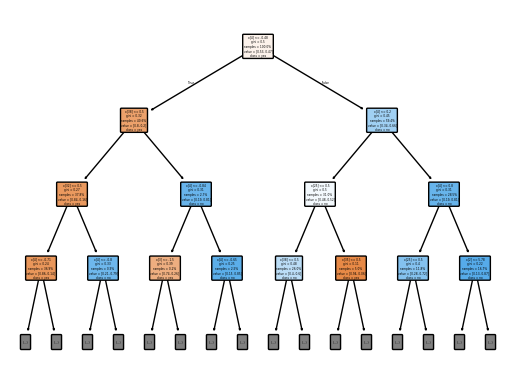

In [49]:
tree_plot = plot_tree(decision_tree_classifier, filled = True, proportion = True, rounded = True,
                      class_names = bank_df["deposit"].unique().tolist(), precision = 2, max_depth = 3)

**1.9: Prune the tree using one of the techniques discussed in class and evaluate the performance.**

**Print the optimal value of the tuned parameter.**

In [ ]:
path = decision_tree_classifier.cost_complexity_pruning_path(dev_X, dev_y)  #Getting alphas and tree sizes
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [52]:
trees = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=0)
    clf.fit(dev_X, dev_y)
    trees.append(clf)

In [53]:
# Training and Testing Scores for Each Tree
train_scores = [accuracy_score(dev_y, clf.predict(dev_X)) for clf in trees]
test_scores = [accuracy_score(test_y, clf.predict(test_X)) for clf in trees]

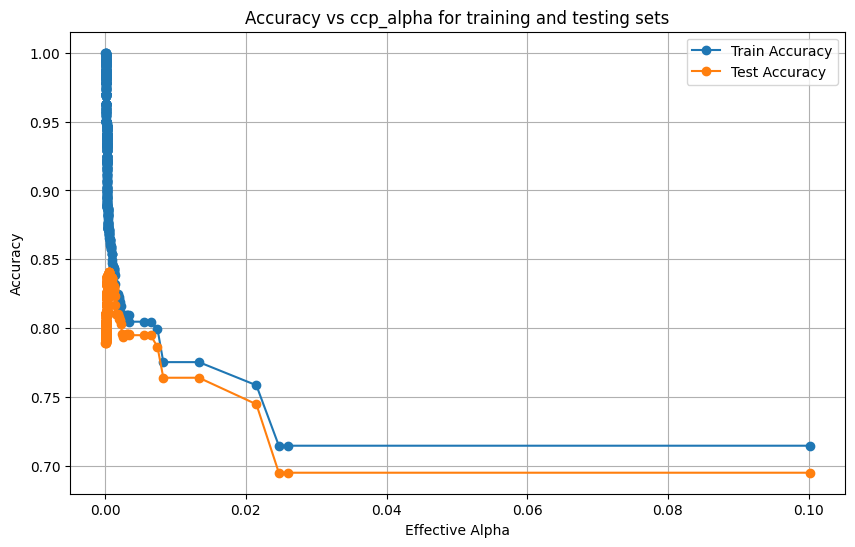

In [54]:
# Plotting the Results
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, label='Train Accuracy', marker='o')
plt.plot(ccp_alphas, test_scores, label='Test Accuracy', marker='o')
plt.xlabel('Effective Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs ccp_alpha for training and testing sets')
plt.legend()
plt.grid()
plt.show()

In [55]:
# Selecting the Optimal ccp_alpha
optimal_alpha_index = np.argmax(test_scores)
optimal_ccp_alpha = ccp_alphas[optimal_alpha_index]

print("Optimal ccp_alpha:", optimal_ccp_alpha)

Optimal ccp_alpha: 0.0005408204174315572


In [56]:
# Fitting the Decision Tree with The Optimal ccp_alpha
pruned_tree_classifier = DecisionTreeClassifier(ccp_alpha=optimal_ccp_alpha, random_state=0)
pruned_tree_classifier.fit(dev_X, dev_y)

DecisionTreeClassifier(ccp_alpha=0.0005408204174315572, random_state=0)

In [113]:
# Evaluating the Performance
train_pred_pruned = pruned_tree_classifier.predict(dev_X)
test_pred_pruned = pruned_tree_classifier.predict(test_X)

train_accuracy_pruned = accuracy_score(dev_y, train_pred_pruned)
test_accuracy_pruned = accuracy_score(test_y, test_pred_pruned)
train_f1_pruned = f1_score(dev_y, train_pred_pruned)
test_f1_pruned = f1_score(test_y, test_pred_pruned)

print("Pruned Training Accuracy:", train_accuracy_pruned)
print("Pruned Testing Accuracy:", test_accuracy_pruned)
print("Pruned Training F1 Score:", train_f1_pruned)
print("Pruned Testing F1 Score:", test_f1_pruned)

Pruned Training Accuracy: 0.8694142681151305
Pruned Testing Accuracy: 0.8410210479175997
Pruned Training F1 Score: 0.8675
Pruned Testing F1 Score: 0.8376771833561957


**1.10: List the top 3 most important features for this trained tree? How would you justify these features being the most important?**

In [115]:
importances = pruned_tree_classifier.feature_importances_
importances_df = pd.DataFrame({'Feature': dev_X.columns, 'Importance': importances})
top_features = importances_df.sort_values(by = 'Importance', ascending = False).head(3)

In [117]:
top_features

,Feature,Importance
4,duration,0.478773
38,poutcome_success,0.122164
25,contact_unknown,0.111873


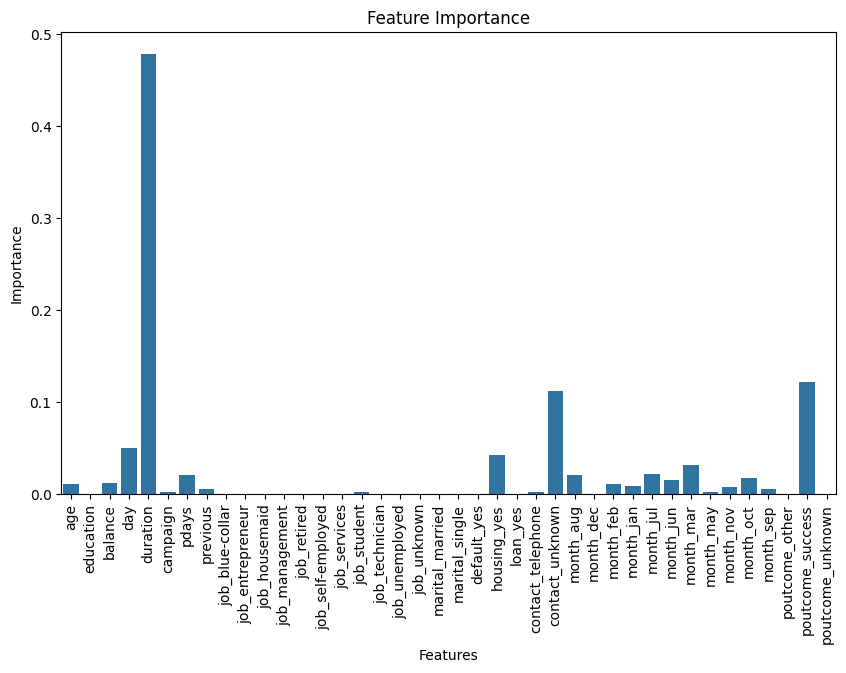

In [116]:
#Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = dev_X.columns, y = importances)
ax.tick_params(axis='x', rotation=90)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

The top 3 most important features:

1.   **poutcome(success)** - A succesful outcome in the previous marketing campaign is a key indicator for success in the current marketing campaign.

2.   **contact(unknown)** - An unknown form of contact communication is impacting the outcome. Finding out more details about this would be beneficial to accelerate subscription growth.

3.   **duration** - The duration of the call is a key feature in identifying whether a person will subscribe for a term deposit or not. Longer call durations suggest higher level of interest.



## Question 2: Random Forests

**2.1: Train a Random Forest model on the development dataset using RandomForestClassifier class in sklearn. Use the default parameters. Evaluate the performance of the model on test dataset. Use accuracy and F1 score to evaluate. Does this perform better than Decision Tree on the test dataset (compare to results in Q 1.7)?**

In [79]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(dev_X, dev_y)

RandomForestClassifier()

In [80]:
y_dev_pred_rf = random_forest_classifier.predict(dev_X)
train_accuracy_rf = accuracy_score(dev_y, y_dev_pred_rf)
print("Training Accuracy for Random Forests:", train_accuracy_rf)
train_f1score_rf = f1_score(dev_y, y_dev_pred_rf)
print("Training F1-Score for Random Forests:", train_f1score_rf)

y_test_pred_rf = random_forest_classifier.predict(test_X)
test_accuracy_rf = accuracy_score(test_y, y_test_pred_rf)
print("Testing Accuracy for Random Forests:", test_accuracy_rf)
test_f1score_rf = f1_score(test_y, y_test_pred_rf)
print("Testing F1-Score for Random Forests:", test_f1score_rf)

Training Accuracy for Random Forests: 1.0
Training F1-Score for Random Forests: 1.0
Testing Accuracy for Random Forests: 0.8360949395432155
Testing F1-Score for Random Forests: 0.8324175824175825


The Random Forest model demonstrates improved predictive performance (0.83 as compared to 0.78 in Decision Trees), likely due to its ensemble nature, which helps reduce overfitting and increases generalization.

**2.2: Do all trees in the trained random forest model have pure leaves? How would you verify that all trees have pure leaves? Print the score (mean accuracy) values of your choosen method**

In [82]:
def check_pure_leaves(forest):
    pure_status = []
    for tree in forest.estimators_:
        tree_ = tree.tree_
        leaves = np.where(tree_.children_left == -1)[0]
        is_pure = np.all(tree_.impurity[leaves] == 0)
        pure_status.append(is_pure)
    return pure_status

# Check for pure leaves in the model
pure_leaves = check_pure_leaves(random_forest_classifier)

print("All trees have pure leaves:", all(pure_leaves))

# Mean accuracy calculation on test dataset
mean_accuracy = random_forest_classifier.score(test_X, test_y)
print("Mean accuracy of the random forest model:", mean_accuracy)

All trees have pure leaves: True
Mean accuracy of the random forest model: 0.8360949395432155


**2.3: Assume you want to improve the performance of this model. Also, assume that you had to pick two hyperparameters that you could tune to improve its performance. Which hyperparameters would you choose and why?**


'n_estimators' and 'max_depth' are two key hyperparameters to improve the performance of the model.


*   **n_estimators** controls the number of trees in the forest. Increasing the number of trees generally leads to improved performance, but it also increases the likelihood of the model overfitting to the training data.
*   **max_depth** controls the depth of each tree in the forest. Controlling the depth helps prevent overfitting, by avoiding capturing noise in the data.



**2.4: Now, assume you had to choose up to 5 different values (each) for these two hyperparameters. How would you choose these values that could potentially give you a performance lift?**

By using a combination of Grid Search and Random Search strategies, a range over which these strategies can be applied could be defined.

For example,

n_estimators = [100, 200, 300, 400, 500]

max_depth = [2, 3, 5, 7, 10]

A combination of Grid Search and Random Search can be used to find the optimal set of hyperparameters for the Random Forest model.

**2.5: Perform model selection using the chosen values for the hyperparameters. Use out-of-bag (OOB) error for finding the optimal hyperparameters. Report on the optimal hyperparameters. Estimate the performance of the optimal model (model trained with optimal hyperparameters) on train and test dataset? Has the performance improved over your plain-vanilla random forest model trained in Q2.1?**

In [99]:
n_estimators = [100, 200, 300, 400, 500]
max_depth = [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]

oob_scores = []  #To store the out-of-bag error

for n_estimator in n_estimators:
  for max_d in max_depth:
    random_forest_classifier_tuned = RandomForestClassifier(n_estimators = n_estimator, max_depth = max_d,
                                                            oob_score = True)
    random_forest_classifier_tuned.fit(dev_X, dev_y)
    oob_scores.append((n_estimator, max_d, random_forest_classifier_tuned.oob_score_))

In [100]:
best_params = max(oob_scores, key = lambda x:x[2])

In [101]:
print("Optimal Hyperparameters:")
print("n_estimator:", best_params[0])
print("max_d:", best_params[1])
print("OOB Score:", best_params[2])

Optimal Hyperparameters:
n_estimator: 400
max_d: 24
OOB Score: 0.8598947250531974


In [102]:
#Fitting a model with the best set of hyperparameters

rf_tuned = RandomForestClassifier(n_estimators = 400, max_depth = 21, random_state = 0)
rf_tuned.fit(dev_X, dev_y)

RandomForestClassifier(max_depth=21, n_estimators=400, random_state=0)

In [103]:
# Evaluating the Performance
train_pred_pruned = pruned_tree_classifier.predict(dev_X)
test_pred_pruned = pruned_tree_classifier.predict(test_X)

train_accuracy_pruned = accuracy_score(dev_y, train_pred_pruned)
test_accuracy_pruned = accuracy_score(test_y, test_pred_pruned)

train_f1_pruned = f1_score(dev_y, train_pred_pruned)
test_f1_pruned = f1_score(test_y, test_pred_pruned)

print("Pruned Training Accuracy:", train_accuracy_pruned)
print("Pruned Testing Accuracy:", test_accuracy_pruned)
print("Pruned Training F1 Score:", train_f1_pruned)
print("Pruned Testing F1 Score:", test_f1_pruned)

Pruned Training Accuracy: 0.8694142681151305
Pruned Testing Accuracy: 0.8410210479175997
Pruned Training F1 Score: 0.8675
Pruned Testing F1 Score: 0.8376771833561957


 **2.6: Can you find the top 3 most important features from the model trained in Q2.5? How do these features compare to the important features that you found from Q1.10? If they differ, which feature set makes more sense?**

In [108]:
importances = rf_tuned.feature_importances_
importances_df = pd.DataFrame({'Feature': dev_X.columns, 'Importance': importances})
top_features = importances_df.sort_values(by = 'Importance', ascending = False).head(3)

In [109]:
top_features

,Feature,Importance
4,duration,0.359864
2,balance,0.076277
0,age,0.074242


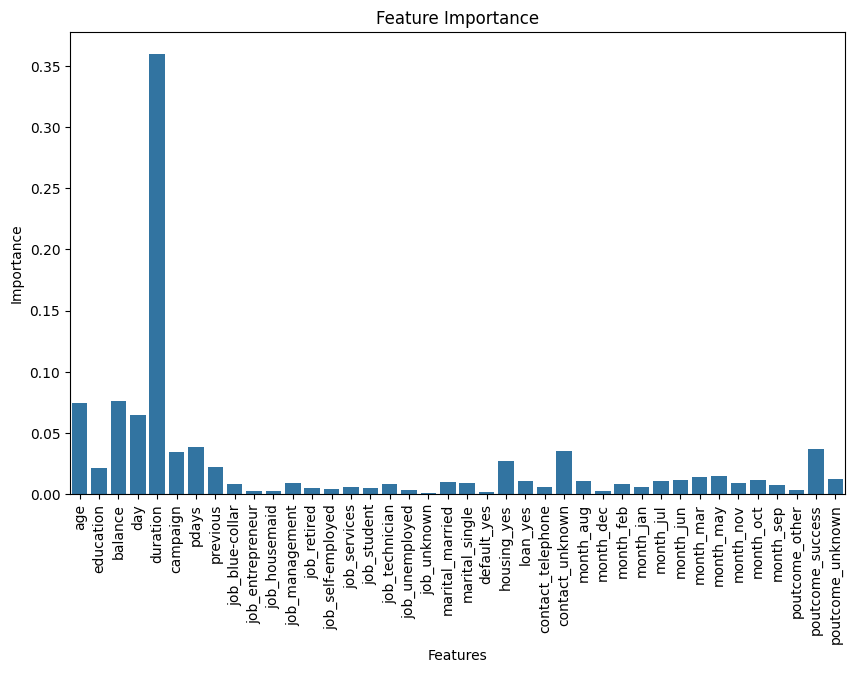

In [111]:
#Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = dev_X.columns, y = importances)
ax.tick_params(axis='x', rotation=90)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


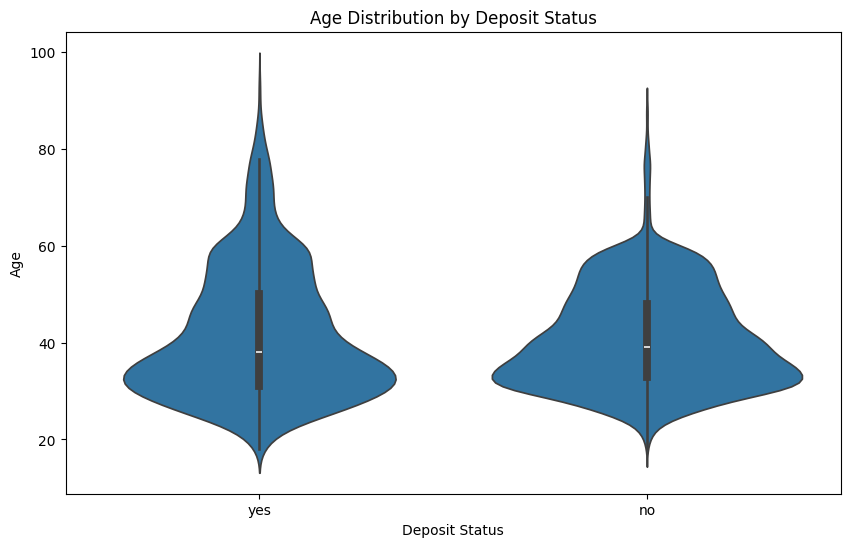

In [123]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='deposit', y='age', data=bank_df)
plt.title('Age Distribution by Deposit Status')
plt.xlabel('Deposit Status')
plt.ylabel('Age')
plt.show()


The three most important features are:

1.  **duration** - The duration of the call is a key feature in identifying whether a person will subscribe for a term deposit or not. Longer call durations suggest higher level of interest
2.  **balance** - High average yearly balance indicates that the clients would have more disposable income to invest, compared to low average yearly balance.
3.  **age** - Younger clients and those in their early middle age are more likely to subscribe to deposits, while older clients may be less inclined to do so.



The features from the Decision Tree Model were:
1.  **poutcome(success)**
2. **contact(unknown)**
3. **duration**



The set of features from the random forest model make more sense in determining the kind of factors (age, balance, duration) directly influencing customer decisions.
Whereas, the factors poutcome, contact, and duration give more idea into the indiredct, marketing aspect of it.

## Question 3: Gradient Boosted Trees

**3.1: Choose three hyperparameters to tune HistGradientBoostingClassifier on the development dataset using 5-fold cross validation. For each hyperparmeter, give it 3 potential values. Report on the time taken to do model selection for the model. Also, report the performance of the test dataset from the optimal models.**

In [135]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'max_iter': [100, 200, 300]
}

In [136]:
hgb_classifier = HistGradientBoostingClassifier()
grid_search = GridSearchCV(estimator = hgb_classifier, param_grid = param_grid, cv=5, scoring='accuracy')

In [137]:
start_time = time.time()
grid_search.fit(dev_X, dev_y)
end_time = time.time()

In [138]:
# Report the time taken
time_taken = end_time - start_time

# Get optimal hyperparameters
optimal_hyperparameters = grid_search.best_params_

# Evaluate on test dataset
test_score = grid_search.score(test_X, test_y)

# Print results
print(f"Time taken for model selection: {time_taken:.2f} seconds")
print(f"Optimal hyperparameters: {optimal_hyperparameters}")
print(f"Test dataset performance (accuracy): {test_score:.2f}")

Time taken for model selection: 119.79 seconds
Optimal hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_iter': 200}
Test dataset performance (accuracy): 0.85


**3.2: Repeat 3.1 for XGBoost.**

**Note**: For XGBoost, you **DO NOT HAVE TO** choose the same hyperparameters as HistGradientBoostingClassifier.

In [141]:
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.3],  # Learning rate
    'max_depth': [3, 5, 7],             # Maximum depth of trees
    'n_estimators': [100, 200, 300]     # Number of boosting rounds
}

In [146]:
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=5, scoring='accuracy')

In [143]:
start_time_xgb = time.time()
grid_search_xgb.fit(dev_X, dev_y)
end_time_xgb = time.time()

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:32:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:32:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:32:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:32:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:32:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

In [144]:
time_taken_xgb = end_time_xgb - start_time_xgb

# Get optimal hyperparameters
optimal_hyperparameters_xgb = grid_search_xgb.best_params_

# Evaluate on test dataset
test_score_xgb = grid_search_xgb.score(test_X, test_y)

# Print results
print(f"Time taken for XGBoost model selection: {time_taken_xgb:.2f} seconds")
print(f"Optimal hyperparameters for XGBoost: {optimal_hyperparameters_xgb}")
print(f"Test dataset performance (accuracy) for XGBoost: {test_score_xgb:.2f}")

Time taken for XGBoost model selection: 91.26 seconds
Optimal hyperparameters for XGBoost: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100}
Test dataset performance (accuracy) for XGBoost: 0.84


In [150]:
xgb_tuned = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', learning_rate = 0.3, max_depth = 5, n_estimators = 100)
xgb_tuned.fit(dev_X, dev_y)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:45:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

**3.3: Compare the results on the test dataset of XGBoost and HistGradientBoostingClassifier. Which model do you prefer and why?**

Both models are similar in terms of accuracy. XGBoost is faster and has a shorter running time than HistGradient Boosting Classifier.

**3.4: Can you list the top 3 important features from the trained XGBoost model? How do they differ from the features found from Random Forest and Decision Tree?**

In [154]:
importances = xgb_tuned.feature_importances_
importances_df = pd.DataFrame({'Feature': dev_X.columns, 'Importance': importances})
top_features = importances_df.sort_values(by = 'Importance', ascending = False).head(5)

In [155]:
top_features

,Feature,Importance
38,poutcome_success,0.190751
25,contact_unknown,0.108740
32,month_mar,0.078447
22,housing_yes,0.063727
4,duration,0.049939


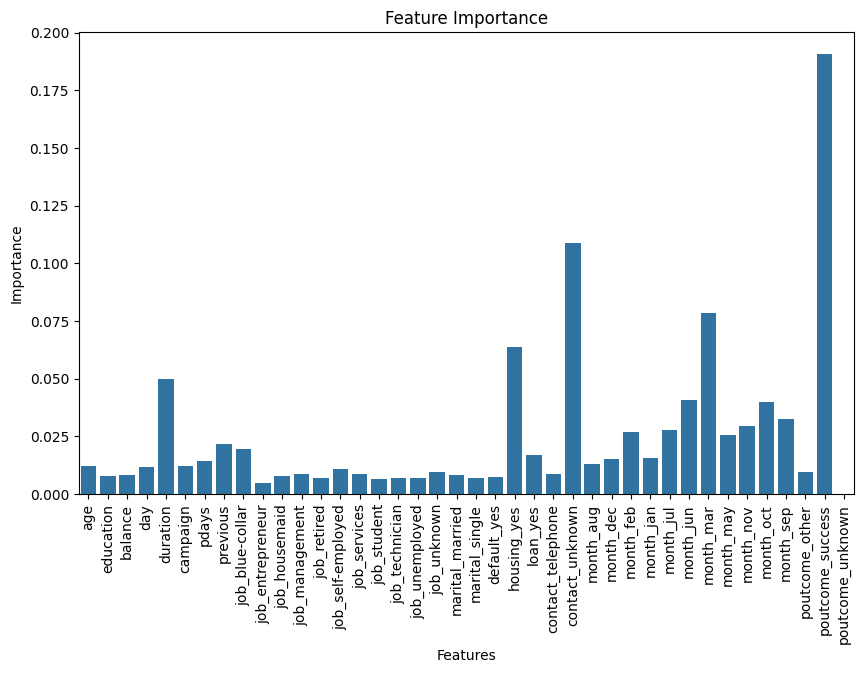

In [153]:
#Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x = dev_X.columns, y = importances)
ax.tick_params(axis='x', rotation=90)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

The top 3 features are:
1.  **poutcome(success)**
2.  **contact(unknown)**
3.  **month (mar)**

They are similar to the features in the Decision Tree model (with the exception of month, which was duration).

The features are different from the ones in the Random Forest Classifier (duration, age, and balance).

**3.5: Can you choose the top 5 features (as given by feature importances from XGBoost) and repeat Q3.2? Does this model perform better than the one trained in Q3.2? Why or why not is the performance better?**

In [156]:
top_5_features = ['poutcome_success', 'contact_unknown', 'month_mar', 'housing_yes', 'duration']

In [159]:
X_train_top5 = dev_X[top_5_features]
X_test_top5 = test_X[top_5_features]

# Train XGBoost with the top 5 features
xgb_top5_model = xgb.XGBClassifier()

# Fit the model on the training data
xgb_top5_model.fit(X_train_top5, dev_y)

# Evaluate on the test data
test_accuracy_top5 = xgb_top5_model.score(X_test_top5, test_y)
print(f'Test Accuracy with Top 5 Features: {test_accuracy_top5}')

Test Accuracy with Top 5 Features: 0.7913121361397224


In [161]:
xgb_model = xgb.XGBClassifier()

# Define the hyperparameters and their potential values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

# Record the start time
start_time = time.time()

# Fit the model
grid_search.fit(X_train_top5, dev_y)

# Record the end time
end_time = time.time()

# Print the best hyperparameters and performance on the training set
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=300; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=3, n_e

In [166]:
# Use the best estimator found in grid search
best_xgb_model = grid_search.best_estimator_

# Evaluate the model on the test set
test_accuracy = best_xgb_model.score(X_test_top5, test_y)
print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.7989252127183162


In [167]:
# Calculate and print the time taken for model selection
time_taken = end_time - start_time
print(f"Time taken for model selection: {time_taken} seconds")

Time taken for model selection: 33.62224864959717 seconds


## Question 4: Calibration

**4.1: Estimate the brier score for the XGBoost model (trained with optimal hyperparameters from Q3.2) scored on the test dataset.**

In [ ]:
## YOUR CODE HERE

**4.2: Calibrate the trained XGBoost model using isotonic regression. Print the brier score after calibration and plot predicted v.s. actual on test datasets from the calibration method.**

In [ ]:
## YOUR CODE HERE

**4.3: Compare the brier scores from 4.1 and 4.2. Do the calibration methods help in having better predicted probabilities?**

Your Comments Here